# Predicting La Paz Temperature: _Darts_

### Next steps
1. Use Darts to test a number of different models (use the same data, 2014-2022, that was used for the Prophet model)
2. Compare the results of the models to the hypertuned Prophet model 
3. Complete the process again but use the additional data you have (2000-2022) to see if this makes a difference.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from darts import TimeSeries
from darts.models import NaiveSeasonal, XGBModel
from darts.metrics import rmse

/Users/jonathonreid/anaconda_navigator/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jonathonreid/anaconda_navigator/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/Users/jonathonreid/anaconda_navigator/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index

In [2]:
# load the data into a dataframe
data = pd.read_csv('../Data/Pre-Processed/la_paz_temp_2014-2022.csv')
df = pd.DataFrame(data=data)
df.head()

,datetime,temp
0,2014-12-01,16.0
1,2014-12-02,14.1
2,2014-12-03,13.3
3,2014-12-04,13.2
4,2014-12-05,15.2


In [3]:
# create a Time Series object from the dataframe
series = TimeSeries.from_dataframe(df=df, time_col='datetime', value_cols='temp')

## Different ways to split the data: index and slicing

### Index

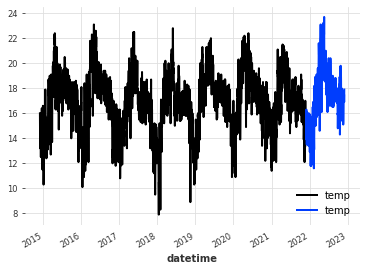

In [4]:
# use an index value to split the data (use 0.875 as previously found that the final 365 days of the dataset made up 12.5% of the data)
series_1, series_2 = series.split_before(0.875)
# plot the data
series_1.plot()
series_2.plot()

### Slicing

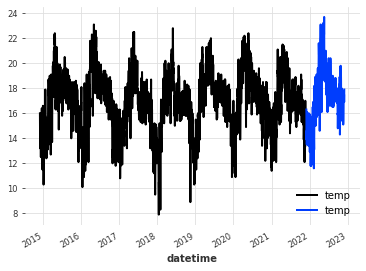

In [5]:
# use slicing to split the data. use the last 365 days of data for testing the predictions we'll make
series_1, series_2 = series[:-365], series[-365:]
# plot the data
series_1.plot()
series_2.plot()

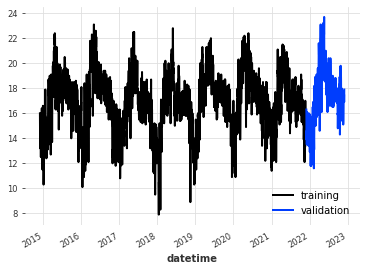

In [6]:
# create a training and validation set
train, val = series.split_before(pd.Timestamp(ts_input="20211201"))
train.plot(label="training")
val.plot(label="validation")

## Naive Seasonal

### For learning... k=1 (useless predictions)

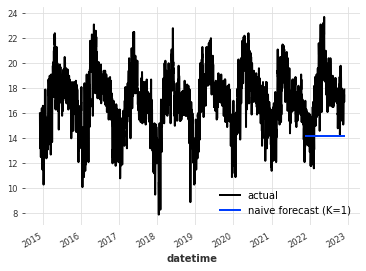

In [7]:
# create a naive seasonal model
seasonal_model = NaiveSeasonal(K=1) # K= determines the value that should be repeated, if set to 1 it will simply predict the rpevious value
# fit the model
seasonal_model.fit(train)
# predict the next 365 instances
seasonal_forecast = seasonal_model.predict(365)

# plot the data
series.plot(label="actual")
# overlay the actual data with the Naive Seasonal predictions
seasonal_forecast.plot(label="naive forecast (K=1)")

The output shows a straight line for the naive forecast because it is repeatedly predicting the previous value (which is the same number).

## Seasonal Naive with K=365

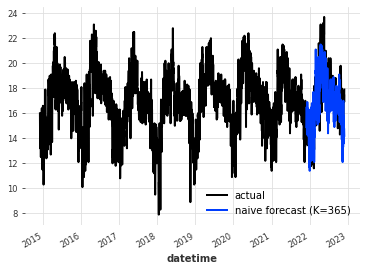

In [8]:
# create a naive seasonal model
seasonal_model = NaiveSeasonal(K=365) # K=365 means it will predict the previous year's value for that date
# fit the model
seasonal_model.fit(train)
# predict the next 365 instances
seasonal_forecast = seasonal_model.predict(365)

# plot the actual data 
series.plot(label="actual")
# overlay the actual data with the Naive Seasonal predictions
seasonal_forecast.plot(label="naive forecast (K=365)")

# Evaluate model

In [9]:
seasonal_naive_model_rmse = rmse(series, seasonal_forecast, intersect=True)
seasonal_naive_model_rmse 

2.171244198579011

## Store seasonal naive model for comparison

In [11]:
%store seasonal_naive_model_rmse

Stored 'seasonal_naive_model_rmse' (float64)
